<a href="https://colab.research.google.com/github/oak50/DS3001-Project1/blob/main/modeling_approach_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Performing some EDA to inform modeling approach

In [1]:
! git clone "https://github.com/oak50/DS3001-Project1.git"

Cloning into 'DS3001-Project1'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 179 (delta 69), reused 89 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (179/179), 6.45 MiB | 4.50 MiB/s, done.
Resolving deltas: 100% (69/69), done.


### Let's group directors based on average film revenue:

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/DS3001-Project1/Data/movie_dataset.csv')

# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select the top 20
top_20_directors = average_revenue_by_director.sort_values(ascending=False).head(20)

# Print the result
pd.set_option('display.float_format', '{:,.0f}'.format)
print(top_20_directors)



director
Chris Buck         1,274,219,009
Kyle Balda         1,156,730,962
Lee Unkrich        1,066,969,703
Joss Whedon          987,943,689
Chris Renaud         875,958,308
James Cameron        840,509,920
Roger Allers         788,241,776
Tim Miller           783,112,979
Colin Trevorrow      758,768,301
Robert Stromberg     758,539,785
Pierre Coffin        757,137,935
Dan Scanlon          743,559,607
David Yates          742,971,665
Peter Jackson        722,071,424
Pete Docter          718,508,837
Chris Miller         676,972,821
George Lucas         667,822,779
Carlos Saldanha      633,112,948
Jan Pinkava          623,722,818
Shane Black          615,612,571
Name: revenue, dtype: float64


In [5]:
# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_20_to_40 = average_revenue_by_director.sort_values(ascending=False).iloc[20:40]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_20_to_40)


director
Dean DeBlois          609,123,048
Jennifer Yuh Nelson   593,431,553
Byron Howard          591,794,936
Francis Lawrence      590,491,436
Richard Marquand      572,700,000
Steve Martino         561,738,948
Alan Taylor           542,587,470
Brenda Chapman        538,983,207
Christopher Nolan     528,435,404
Andrew Stanton        527,261,339
David Silverman       527,068,851
Andrew Adamson        521,371,889
Marc Webb             506,218,674
Anthony Russo         499,625,609
Michael Bay           486,043,720
Chris Williams        481,042,718
John Lasseter         473,189,112
Rich Moore            471,222,889
Gore Verbinski        453,859,051
Conrad Vernon         423,061,254
Name: revenue, dtype: float64


In [7]:
# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_40_to_60 = average_revenue_by_director.sort_values(ascending=False).iloc[40:60]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_40_to_60)

director
Eric Darnell          420,472,746
Chris Sanders         408,609,738
Jon Favreau           403,142,372
Alfonso Cuar\u00f3n   402,443,426
Rupert Sanders        396,600,000
Brad Bird             389,617,275
Sam Mendes            387,649,830
J.J. Abrams           377,747,923
Roland Emmerich       369,602,630
Mark Osborne          364,657,905
Phyllida Lloyd        362,399,168
Rob Marshall          356,292,277
Ralph Zondag          354,248,063
Zack Snyder           353,742,484
Bryan Singer          351,029,375
Fergal Reilly         349,779,543
Irvin Kershner        349,200,000
Mike Gabriel          346,079,773
Joseph Kosinski       343,115,668
Steven Spielberg      338,792,339
Name: revenue, dtype: float64


In [8]:
# Calculate the number of unique directors
unique_directors_count = df['director'].nunique()

print(f"Number of unique directors: {unique_directors_count}")


Number of unique directors: 2349


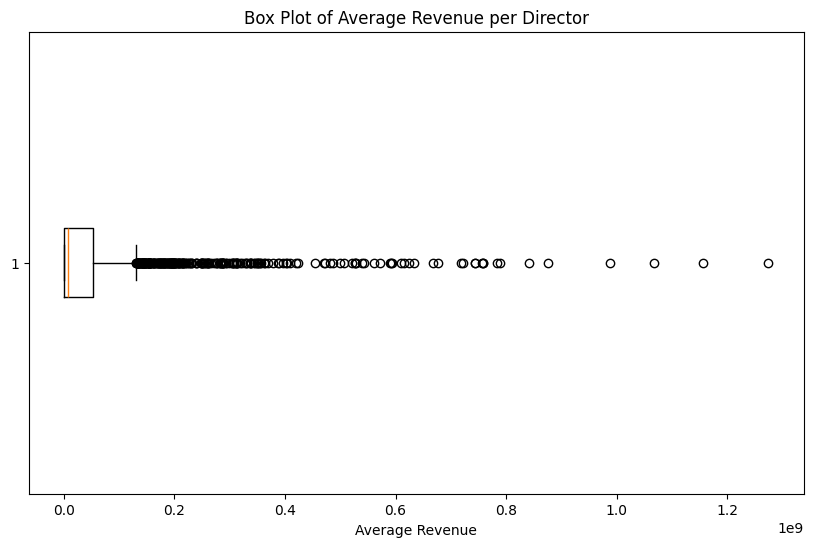

In [9]:
import matplotlib.pyplot as plt

# Calculate the average revenue per director
average_revenue_by_director = df.groupby('director')['revenue'].mean()
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(average_revenue_by_director.dropna(), vert=False)
plt.xlabel('Average Revenue')
plt.title('Box Plot of Average Revenue per Director')
plt.show()


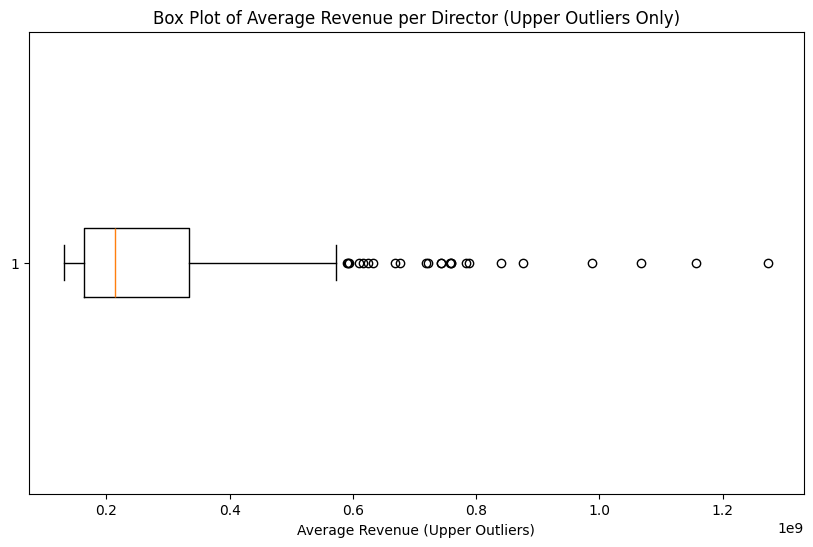

In [10]:
# Calculate the average revenue per director
average_revenue_by_director = df.groupby('director')['revenue'].mean().dropna()

# Calculate the IQR to identify upper outliers
q1 = average_revenue_by_director.quantile(0.25)
q3 = average_revenue_by_director.quantile(0.75)
iqr = q3 - q1

# Define the upper bound for outliers
upper_bound = q3 + 1.5 * iqr

# Extract only the upper outliers
upper_outliers = average_revenue_by_director[average_revenue_by_director > upper_bound]

# Create a box plot for the upper outliers
plt.figure(figsize=(10, 6))
plt.boxplot(upper_outliers, vert=False)
plt.xlabel('Average Revenue (Upper Outliers)')
plt.title('Box Plot of Average Revenue per Director (Upper Outliers Only)')
plt.show()


## Studio

In [11]:
import ast

# Function to extract production company names from the JSON-like string
def extract_company_names(entry):
    try:
        # Convert the string representation of the list to an actual list
        companies = ast.literal_eval(entry)
        return [company['name'] for company in companies]
    except (ValueError, SyntaxError):
        return []

# Apply the function to extract all company names into a new column
df['extracted_studios_extracted'] = df['production_companies'].dropna().apply(extract_company_names)

# Explode the list of companies so each company has its own row
df_exploded = df.explode('extracted_studios_extracted')

# Group by the individual production companies and calculate average revenue
average_revenue_by_company = df_exploded.groupby('extracted_studios_extracted')['revenue'].mean()

# Sort the results by average revenue in descending order and select the top 20
top_20_companies = average_revenue_by_company.sort_values(ascending=False).head(20)

# Print the top 20 production companies and their average revenues
print("Top 20 Production Companies with the Highest Average Revenues:")
print(top_20_companies)


Top 20 Production Companies with the Highest Average Revenues:
extracted_studios_extracted
Abu Dhabi Film Commission                     1,506,249,360
Colorado Office of Film, Television & Media   1,506,249,360
Québec Production Services Tax Credit         1,506,249,360
Prime Focus                                   1,405,403,694
Vita-Ray Dutch Productions (III)              1,153,304,495
Deluxe Digital Studios                        1,153,304,495
Lightstorm Entertainment                      1,124,376,357
Ian Bryce Productions                         1,091,405,097
Second Mate Productions                       1,013,329,906
Fairview Entertainment                          966,550,600
3Foot7                                          956,019,788
The Saul Zaentz Company                         898,827,882
Patalex IV Productions Limited                  895,921,036
China Movie Channel                             886,867,618
B24                                             880,674,609
Cruel & U

## Genres

In [12]:
# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Print the unique words
for word in unique_words:
    print(word)



Foreign
Crime
Fiction
Science
Horror
Mystery
Music
Animation
Romance
Comedy
TV
Documentary
Western
Fantasy
Family
Adventure
History
Drama
Thriller
Movie
Action
War


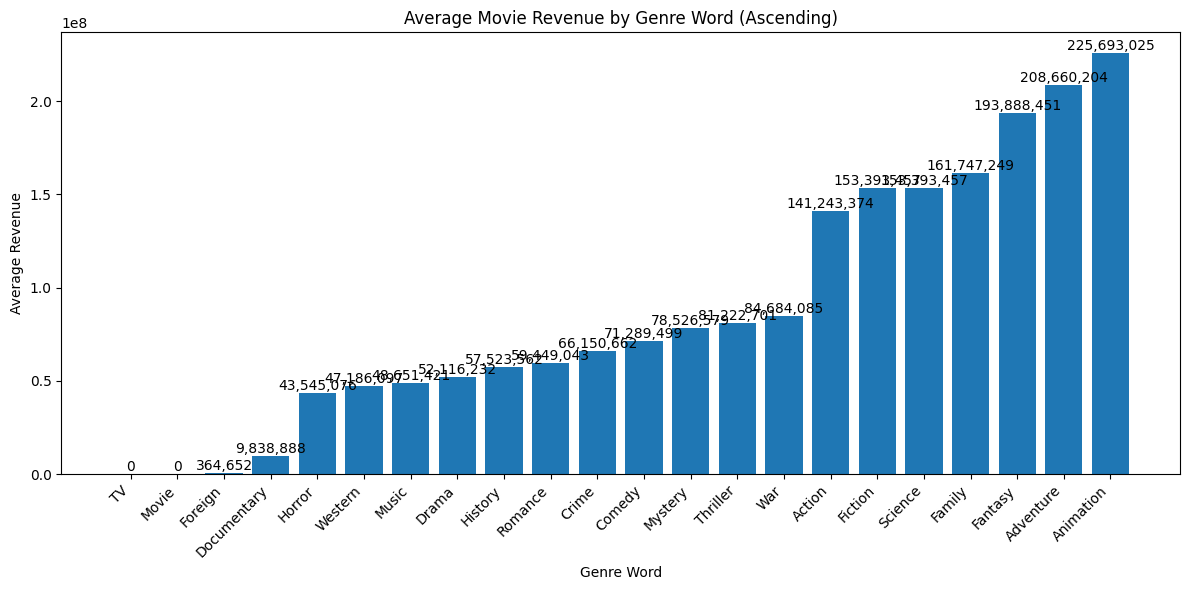

In [19]:
# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Calculate average revenue for movies containing each unique genre word
average_revenue_per_word = {}

for word in unique_words:
    # Filter movies that contain the word in their genre
    filtered_movies = df[df['genres'].str.contains(word, na=False)]

    # Calculate the average revenue for these movies
    average_revenue = filtered_movies['revenue'].mean()
    average_revenue_per_word[word] = average_revenue

# Sort the dictionary by average revenue in ascending order
sorted_revenue = dict(sorted(average_revenue_per_word.items(), key=lambda item: item[1]))

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_revenue.keys(), sorted_revenue.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre Word')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue by Genre Word (Ascending)')

# Label the bars with the average revenue values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


It seems that "science fiction" and "tv movie" should be grouped together as paired words. Let's reword the script to reflect this

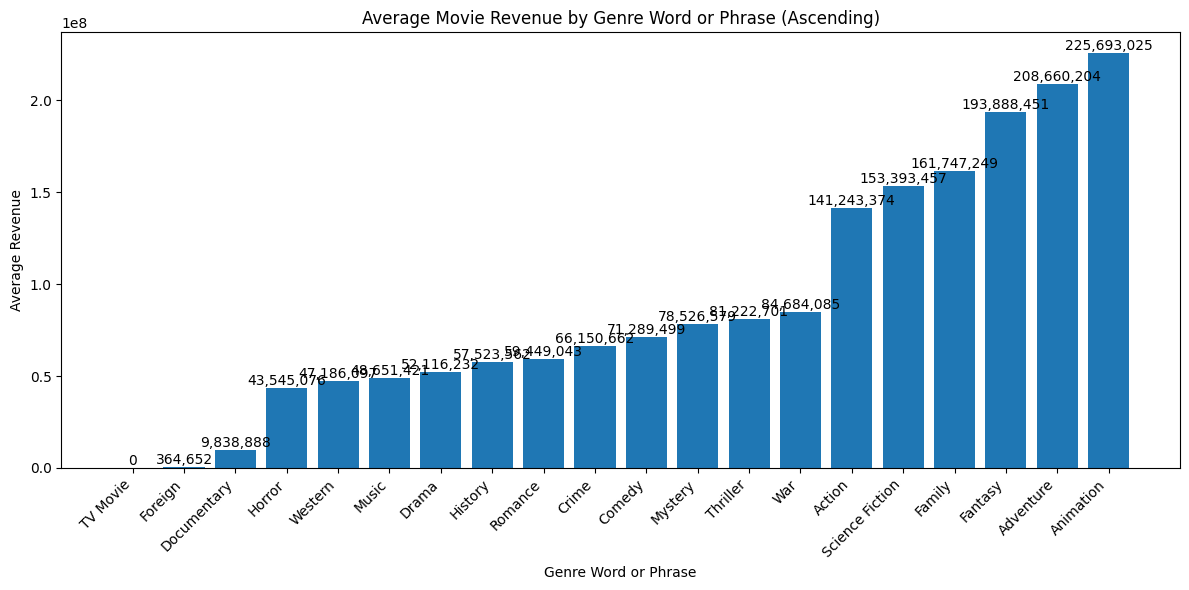

In [14]:
import re

# Define the list of phrases to preserve
phrases_to_preserve = ['TV Movie', 'Science Fiction']

# Function to split the genres while preserving specific phrases
def split_genres(genre_string):
    for phrase in phrases_to_preserve:
        genre_string = genre_string.replace(phrase, phrase.replace(' ', '_'))
    return genre_string.split()

# Combine all genre entries into a single string and split into individual words or preserved phrases
all_words = ' '.join(df['genres'].dropna())
all_words_split = split_genres(all_words)

# Replace underscores back to spaces in preserved phrases
all_words_split = [word.replace('_', ' ') for word in all_words_split]

# Get unique words or phrases using a set
unique_words = set(all_words_split)

# Calculate average revenue for movies containing each unique genre word or phrase
average_revenue_per_word = {}

for word in unique_words:
    # Filter movies that contain the word or phrase in their genre
    filtered_movies = df[df['genres'].str.contains(re.escape(word), na=False)]

    # Calculate the average revenue for these movies
    average_revenue = filtered_movies['revenue'].mean()
    average_revenue_per_word[word] = average_revenue

# Sort the dictionary by average revenue in ascending order
sorted_revenue = dict(sorted(average_revenue_per_word.items(), key=lambda item: item[1]))

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_revenue.keys(), sorted_revenue.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre Word or Phrase')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue by Genre Word or Phrase (Ascending)')

# Label the bars with the average revenue values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Revenue by Season of Release

In [15]:
# print release_season values
print(df['release_date'].unique())

# take the second value of the date (the month) and store as release_month
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

# drop nan values from this new month df
df.dropna(subset=['release_month'], inplace=True)

# print unique values of release_month
print(df['release_month'].unique())

['2009-12-10' '2007-05-19' '2015-10-26' ... '2011-12-26' '2013-10-13'
 '2012-05-03']
[12.  5. 10.  7.  3. 11.  4.  6.  2.  8.  9.  1.]


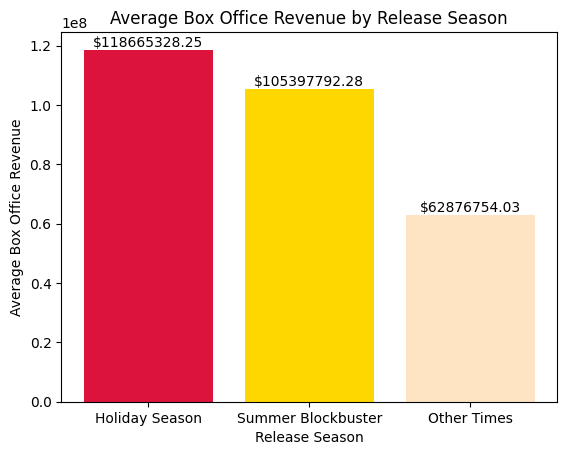

In [16]:
# encode release_month variable to a release_season
def release_season(release_month):
    if release_month in [11, 12]:
        return 0  # Holiday season
    elif release_month in [6, 7, 8]:
        return 1  # Summer blockbuster season
    elif release_month in [1, 2, 3, 4, 5, 9, 10]:
        return 2  # Other times of the year
    else:
        raise ValueError("Month must be an integer from 1 to 12")

# apply above function to create a 'release_season' column in the df
df['season'] = df['release_month'].apply(release_season)

# group by season and calculate average revenue
avg_revenue_by_season = df.groupby('season')['revenue'].mean()

# plot results
seasons = ['Holiday Season', 'Summer Blockbuster', 'Other Times']
avg_revenue = [avg_revenue_by_season.get(season, 0) for season in range(3)]

plt.bar(seasons, avg_revenue_by_season, color=['crimson', 'gold', 'bisque'])
plt.xlabel('Release Season')
plt.ylabel('Average Box Office Revenue')
plt.title('Average Box Office Revenue by Release Season')

for i, v in enumerate(avg_revenue):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.show()

In [20]:
df.to_csv('movie_dataset_2.csv')